# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# save current date for later use
current_date = time.strftime("%m/%d/%Y", time.localtime())

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations -- added smaller sample to test
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

628


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
base_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key + "&q="

print("Beginning Data Retrieval")
print("--------------------------------")

#set up lists to hold data retrieved in the for loop
lat = []
lon = []
temperature = []
humidity = []
cloudiness = []
windspeed = []
country = []
datetime = []

good_city = []

cityCount = 0
setCount = 1
# Build query URL
for city in cities:

    if cityCount % 50 == 0:
        time.sleep(10)
        setCount += 1
        cityCount = 0
    cityCount += 1
    print(f"Processing Record {cityCount} of Set {setCount} | {city}")
    try:
        weather_response = requests.get(base_url + city)
        weather_json = weather_response.json()
        lat.append(weather_json["coord"]["lat"])
        lon.append(weather_json["coord"]["lon"])
        temperature.append(weather_json["main"]["temp_max"])
        humidity.append(weather_json["main"]["humidity"])
        cloudiness.append(weather_json["clouds"]["all"])
        windspeed.append(weather_json["wind"]["speed"])
        country.append(weather_json["sys"]["country"])
        datetime.append(weather_json["dt"])
        good_city.append(city)
    except: 
        print("City not found.  Skipping...")
 

Beginning Data Retrieval
--------------------------------
Processing Record 2 of Set 1 | bengkulu
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | torbay
Processing Record 8 of Set 1 | belushya guba
City not found.  Skipping...
Processing Record 9 of Set 1 | leningradskiy
Processing Record 10 of Set 1 | gat
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | warman
Processing Record 13 of Set 1 | tasiilaq
Processing Record 14 of Set 1 | dustlik
Processing Record 15 of Set 1 | upington
Processing Record 16 of Set 1 | vaitupu
City not found.  Skipping...
Processing Record 17 of Set 1 | saint george
Processing Record 18 of Set 1 | evensk
Processing Record 19 of Set 1 | palmer
Processing Record 20 of Set 1 | fortuna
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | pombas
Processing Record 23 of Set 1 | nikolsko

City not found.  Skipping...
Processing Record 45 of Set 4 | nurota
Processing Record 46 of Set 4 | ano mera
Processing Record 47 of Set 4 | ornskoldsvik
Processing Record 48 of Set 4 | seoul
Processing Record 49 of Set 4 | umm bab
Processing Record 50 of Set 4 | satitoa
City not found.  Skipping...
Processing Record 1 of Set 5 | tautira
Processing Record 2 of Set 5 | mumford
Processing Record 3 of Set 5 | dickson
Processing Record 4 of Set 5 | emerald
Processing Record 5 of Set 5 | mancio lima
Processing Record 6 of Set 5 | daltenganj
Processing Record 7 of Set 5 | riviere-au-renard
Processing Record 8 of Set 5 | tymovskoye
Processing Record 9 of Set 5 | alotau
City not found.  Skipping...
Processing Record 10 of Set 5 | iqaluit
Processing Record 11 of Set 5 | kupang
Processing Record 12 of Set 5 | buala
Processing Record 13 of Set 5 | billings
Processing Record 14 of Set 5 | ozinki
Processing Record 15 of Set 5 | mahebourg
Processing Record 16 of Set 5 | luderitz
Processing Record 17

Processing Record 33 of Set 8 | brainerd
Processing Record 34 of Set 8 | tarudant
City not found.  Skipping...
Processing Record 35 of Set 8 | mackay
Processing Record 36 of Set 8 | smithers
Processing Record 37 of Set 8 | kiunga
Processing Record 38 of Set 8 | darhan
Processing Record 39 of Set 8 | ternate
Processing Record 40 of Set 8 | oranjestad
Processing Record 41 of Set 8 | awjilah
Processing Record 42 of Set 8 | marawi
Processing Record 43 of Set 8 | lincoln
Processing Record 44 of Set 8 | calella
Processing Record 45 of Set 8 | chillicothe
Processing Record 46 of Set 8 | logansport
Processing Record 47 of Set 8 | lasa
Processing Record 48 of Set 8 | faanui
Processing Record 49 of Set 8 | sibolga
Processing Record 50 of Set 8 | santa cruz
Processing Record 1 of Set 9 | bolshoye sorokino
City not found.  Skipping...
Processing Record 2 of Set 9 | bull savanna
Processing Record 3 of Set 9 | khatanga
Processing Record 4 of Set 9 | ganzhou
Processing Record 5 of Set 9 | havelock
Pr

Processing Record 20 of Set 12 | mananjary
Processing Record 21 of Set 12 | campo verde
Processing Record 22 of Set 12 | mendi
Processing Record 23 of Set 12 | kem
Processing Record 24 of Set 12 | jiujiang
Processing Record 25 of Set 12 | coos bay
Processing Record 26 of Set 12 | haimen
Processing Record 27 of Set 12 | aguimes
Processing Record 28 of Set 12 | big spring
Processing Record 29 of Set 12 | kurashiki
Processing Record 30 of Set 12 | zhob
Processing Record 31 of Set 12 | matara
Processing Record 32 of Set 12 | bocas del toro
Processing Record 33 of Set 12 | barao de melgaco
Processing Record 34 of Set 12 | ratnagiri
Processing Record 35 of Set 12 | riachao das neves
Processing Record 36 of Set 12 | katima mulilo
Processing Record 37 of Set 12 | tsihombe
City not found.  Skipping...
Processing Record 38 of Set 12 | kuche
City not found.  Skipping...
Processing Record 39 of Set 12 | nakusp
Processing Record 40 of Set 12 | litovko
Processing Record 41 of Set 12 | boundiali
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create the dictionary from the individual lists
city_dict = {
    "city": good_city,
    "lat": lat,
    "lon": lon,
    "maxtemp": temperature,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "windspeed": windspeed,
    "country": country,
    "datetime": datetime
}

#Convert dictionary to dataframe
city_data = pd.DataFrame(city_dict)

# Save the dataframe as a csv.
city_data.to_csv(output_data_file)

# Print the first five rows of the dataframe
city_data.head()

,city,lat,lon,maxtemp,humidity,cloudiness,windspeed,country,datetime
0,jalu,29.03,21.55,59.20,35,0,11.54,LY,1607229534
1,butaritari,3.07,172.79,82.04,78,90,12.48,KI,1607229534
2,port elizabeth,-33.92,25.57,66.20,93,90,10.29,ZA,1607229449
3,yar-sale,66.83,70.83,11.26,94,92,10.40,RU,1607229534
4,lebu,-37.62,-73.65,52.09,92,96,12.15,CL,1607229534


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Simple method to make sure humidity levels above 100 are dropped
clean_city_data = city_data.loc[city_data["humidity"] <= 100]

In [7]:
# print the first 5 again
clean_city_data.head()

,city,lat,lon,maxtemp,humidity,cloudiness,windspeed,country,datetime
0,jalu,29.03,21.55,59.20,35,0,11.54,LY,1607229534
1,butaritari,3.07,172.79,82.04,78,90,12.48,KI,1607229534
2,port elizabeth,-33.92,25.57,66.20,93,90,10.29,ZA,1607229449
3,yar-sale,66.83,70.83,11.26,94,92,10.40,RU,1607229534
4,lebu,-37.62,-73.65,52.09,92,96,12.15,CL,1607229534


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

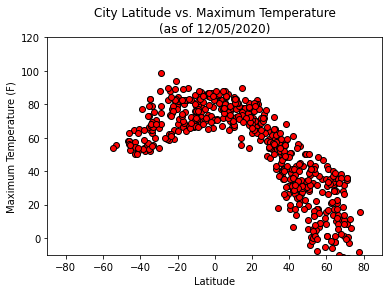

In [8]:
# Define 
temps = clean_city_data["maxtemp"]
lat = clean_city_data["lat"]

plt.scatter(lat, temps, marker="o", facecolors="red", edgecolors="black")

# Refine the display
plt.ylim(-10, 120)
plt.xlim(-90, 90)
plt.title("City Latitude vs. Maximum Temperature\n(as of " + current_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.savefig("output_data/latitude_temperature.png")
plt.show()

This scatter plot suggests there is a strong relationship between latitude and temperature, with locations closest to the equator (Latitude = 0) being highest.  The other interesting observation from this is the lack of cities at southern latitudes -- those less than latitude < -55, as compared to the northern latitudes.  Knowing that land mass is more sparse at far southern latitudes, this makes sense.

## Latitude vs. Humidity Plot

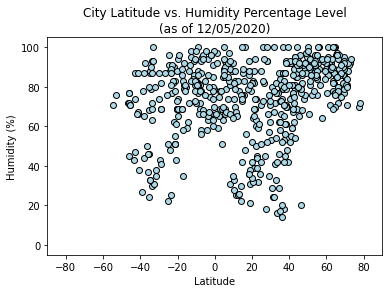

In [9]:
# Define 
humidity = clean_city_data["humidity"]
lat = clean_city_data["lat"]

plt.scatter(lat, humidity, marker="o", facecolors="lightblue", edgecolors="black")

# Refine the display
plt.ylim(-5, 105)
plt.xlim(-90, 90)
plt.title("City Latitude vs. Humidity Percentage Level\n(as of " + current_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/latitude_humidity.png")
plt.show()

This plot does not seem to show much if any relationship between latitude and humidity levels.  The few low humidity cities tend to lie in a narrow band (20-40 in both north and south), suggesting a potential weaker relationship but similar to the temperature plot above.

## Latitude vs. Cloudiness Plot

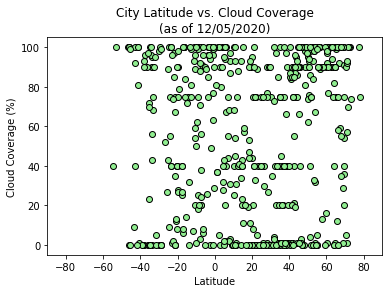

In [10]:
# Define 
humidity = clean_city_data["cloudiness"]
lat = clean_city_data["lat"]

plt.scatter(lat, cloudiness, marker="o", facecolors="lightgreen", edgecolors="black")

# Refine the display
plt.ylim(-5, 105)
plt.xlim(-90, 90)
plt.title("City Latitude vs. Cloud Coverage\n(as of " + current_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloud Coverage (%)")
plt.savefig("output_data/latitude_cloudiness.png")
plt.show()

This plot suggests no relationship between cloudiness and latitude.

## Latitude vs. Wind Speed Plot

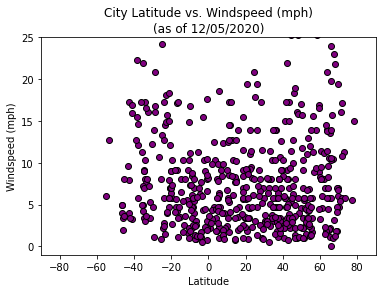

In [11]:
# Define 
humidity = clean_city_data["windspeed"]
lat = clean_city_data["lat"]

plt.scatter(lat, windspeed, marker="o", facecolors="purple", edgecolors="black")

# Refine the display
plt.ylim(-1, 25)
plt.xlim(-90, 90)
plt.title("City Latitude vs. Windspeed (mph)\n(as of " + current_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.savefig("output_data/latitude_windspeed.png")
plt.show()

The very weak u-shape to this graph suggests there might be a weak correlation between latitude and wind speed, with higher speeds found at latitudes further from the equator

## Linear Regression

In [12]:
# Create northern and southern hemisphere datasets.  
northern_city_data = clean_city_data.loc[city_data["lat"] >= 0]
southern_city_data = clean_city_data.loc[city_data["lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

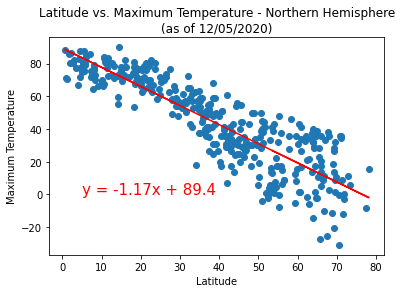

R-squared = 0.7643589435412794


In [13]:
# Create lists
n_temp = northern_city_data["maxtemp"]
n_lat = northern_city_data["lat"]

# Find regression 
nt_slope, nt_int, nt_r, nt_p, nt_std_err = linregress(n_lat, n_temp)
regress_values = n_lat * nt_slope + nt_int
line_eq = "y = " + str(round(nt_slope,2)) + "x + " + str(str(round(nt_int,2)))
plt.scatter(n_lat, n_temp)
plt.plot(n_lat,regress_values,"r-")
plt.annotate(line_eq,(5, 0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.title("Latitude vs. Maximum Temperature - Northern Hemisphere\n(as of " + current_date +")")
plt.savefig("output_data/northern_latitude_temperature.png")
plt.show()
print("R-squared = " + str(nt_r**2))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

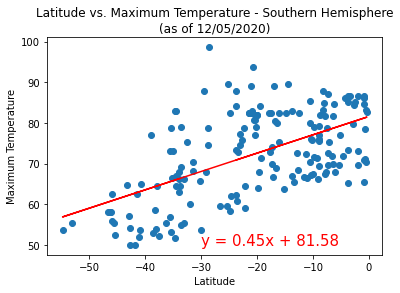

R-squared = 0.3255241752083048


In [14]:
# Create lists
s_temp = southern_city_data["maxtemp"]
s_lat = southern_city_data["lat"]

# Find regression 
st_slope, st_int, st_r, st_p, st_std_err = linregress(s_lat, s_temp)
regress_values = s_lat * st_slope + st_int
line_eq = "y = " + str(round(st_slope,2)) + "x + " + str(str(round(st_int,2)))
plt.scatter(s_lat, s_temp)
plt.plot(s_lat,regress_values,"r-")
plt.annotate(line_eq,(-30, 50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.title("Latitude vs. Maximum Temperature - Southern Hemisphere\n(as of " + current_date +")")
plt.savefig("output_data/southern_latitude_temperature.png")
plt.show()
print("R-squared = " + str(st_r**2))

##### Latitude vs. Temperature

As the plots show, those cities closest to the equator (latitude = 0) have the higher maximum temperatures.  The northern hemisphere has a higher R-squared value than the southern, suggesting the regression line fits the data much better in the northern data set than southern.  Also, in looking at the plots, there seem to be more "outliers" in the southern dataset.  However, temperature and latitude do seem to be strongly related.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

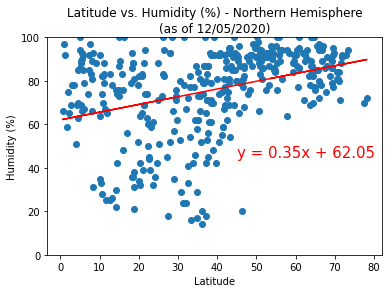

R-squared = 0.12759610931069526


In [15]:
# Create lists
n_humidity = northern_city_data["humidity"]
n_lat = northern_city_data["lat"]

# Find regression 
nh_slope, nh_int, nh_r, nh_p, nh_std_err = linregress(n_lat, n_humidity)
regress_values = n_lat * nh_slope + nh_int
line_eq = "y = " + str(round(nh_slope,2)) + "x + " + str(str(round(nh_int,2)))
plt.scatter(n_lat, n_humidity)
plt.plot(n_lat,regress_values,"r-")
plt.annotate(line_eq,(45,45),fontsize=15,color="red")
plt.ylim(0,100)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Latitude vs. Humidity (%) - Northern Hemisphere\n(as of " + current_date +")")
plt.savefig("output_data/northern_latitude_humidity.png")
plt.show()
print("R-squared = " + str(nh_r**2))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

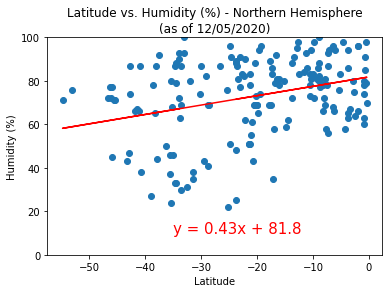

R-squared = 0.1048011113233202


In [16]:
# Create lists
s_humidity = southern_city_data["humidity"]
s_lat = southern_city_data["lat"]

# Find regression 
sh_slope, sh_int, sh_r, sh_p, sh_std_err = linregress(s_lat, s_humidity)
regress_values = s_lat * sh_slope + sh_int
line_eq = "y = " + str(round(sh_slope,2)) + "x + " + str(str(round(sh_int,2)))
plt.scatter(s_lat, s_humidity)
plt.plot(s_lat,regress_values,"r-")
plt.annotate(line_eq,(-35, 10),fontsize=15,color="red")
plt.ylim(0,100)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Latitude vs. Humidity (%) - Northern Hemisphere\n(as of " + current_date +")")
plt.savefig("output_data/southern_latitude_humidity.png")
plt.show()
print("R-squared = " + str(sh_r**2))

##### Latitude vs. Humidity

As the R-squared values for these two plots show, neither regression equation is a very good fit for the humidity data. The lower humidity cities do seem to cluster around 10 - 15 degrees from the equator either direction, going to around 45 - 50 degrees.  However, the two plots show a different relationship between latitude and humidity. In the northern hemisphere, humidity levels are slightly higher the further the city is from the equator.  In the southern hemisphere, the opposite is true.  Neither line's slope is particularly large.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

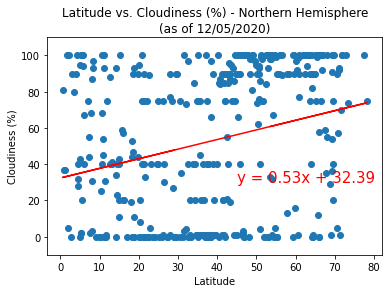

R-squared = 0.07058149855448542


In [17]:
# Create lists
n_clouds = northern_city_data["cloudiness"]
n_lat = northern_city_data["lat"]

# Find regression 
nc_slope, nc_int, nc_r, nc_p, nc_std_err = linregress(n_lat, n_clouds)
regress_values = n_lat * nc_slope + nc_int
line_eq = "y = " + str(round(nc_slope,2)) + "x + " + str(str(round(nc_int,2)))
plt.scatter(n_lat, n_clouds)
plt.plot(n_lat,regress_values,"r-")
plt.annotate(line_eq,(45,30),fontsize=15,color="red")
plt.ylim(-10,110)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Latitude vs. Cloudiness (%) - Northern Hemisphere\n(as of " + current_date +")")
plt.savefig("output_data/northern_latitude_cloudiness.png")
plt.show()
print("R-squared = " + str(nc_r**2))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

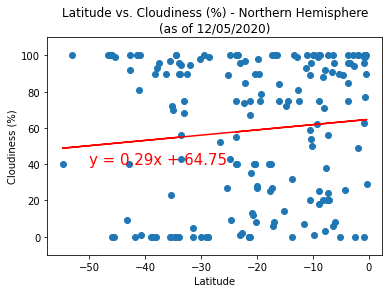

R-squared = 0.01021695314835189


In [18]:
# Create lists
s_clouds = southern_city_data["cloudiness"]
s_lat = southern_city_data["lat"]

# Find regression 
sc_slope, sc_int, sc_r, sc_p, sc_std_err = linregress(s_lat, s_clouds)
regress_values = s_lat * sc_slope + sc_int
line_eq = "y = " + str(round(sc_slope,2)) + "x + " + str(str(round(sc_int,2)))
plt.scatter(s_lat, s_clouds)
plt.plot(s_lat,regress_values,"r-")
plt.annotate(line_eq,(-50, 40),fontsize=15,color="red")
plt.ylim(-10,110)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Latitude vs. Cloudiness (%) - Northern Hemisphere\n(as of " + current_date +")")
plt.savefig("output_data/southern_latitude_cloudiness.png")
plt.show()
print("R-squared = " + str(sc_r**2))

##### Latitude vs. Cloudiness

The regression for the southern hemisphere data comparing latitude and cloudiness is such a bad fit (R-squared = .0008) and the line is so flat that there does not appear to be much if any relationship between latitude and cloudiness.  The northern hemisphere slope is higher, suggesting those cities closest to the equator have less cloudiness than those further, but the low R-squared value (.08) suggests this equation is a poor fit with the data and the relationship may not, in fact, exist.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

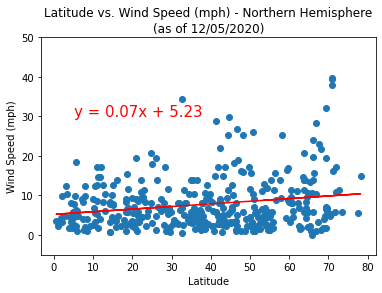

R-squared = 0.04128405525605373


In [19]:
# Create lists
n_wind = northern_city_data["windspeed"]
n_lat = northern_city_data["lat"]

# Find regression 
nw_slope, nw_int, nw_r, nw_p, nw_std_err = linregress(n_lat, n_wind)
regress_values = n_lat * nw_slope + nw_int
line_eq = "y = " + str(round(nw_slope,2)) + "x + " + str(str(round(nw_int,2)))
plt.scatter(n_lat, n_wind)
plt.plot(n_lat,regress_values,"r-")
plt.annotate(line_eq,(5,30),fontsize=15,color="red")
plt.ylim(-5,50)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Latitude vs. Wind Speed (mph) - Northern Hemisphere\n(as of " + current_date +")")
plt.savefig("output_data/northern_latitude_windspeed.png")
plt.show()
print("R-squared = " + str(nw_r**2))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

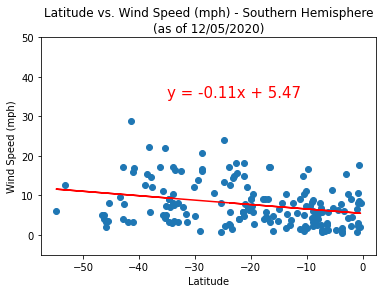

R-squared = 0.0780770582969687


In [20]:
# Create lists
s_wind = southern_city_data["windspeed"]
s_lat = southern_city_data["lat"]

# Find regression 
sw_slope, sw_int, sw_r, sw_p, sw_std_err = linregress(s_lat, s_wind)
regress_values = s_lat * sw_slope + sw_int
line_eq = "y = " + str(round(sw_slope,2)) + "x + " + str(str(round(sw_int,2)))
plt.scatter(s_lat, s_wind)
plt.plot(s_lat,regress_values,"r-")
plt.annotate(line_eq,(-35, 35),fontsize=15,color="red")
plt.ylim(-5,50)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Latitude vs. Wind Speed (mph) - Southern Hemisphere\n(as of " + current_date +")")
plt.savefig("output_data/southern_latitude_windspeed.png")
plt.show()
print("R-squared = " + str(sw_r**2))

##### Latitude vs. Wind Speed

The low R-squared values (northern hemisphere = .04, southern hemisphere = .07) suggest neither regression fits the data well.  However, both plots show slightly lower wind speed closer to the equator, and might suggest a weak relationship between latitude and wind speed.